# Introdução
### Nesse projeto busco analisar os dados de clientes de cartão de crédito para realizar uma analise de clusterização.

### As features utilizadas nesse dataset são as seguintes:

- CUST_ID: Identificação do titular do cartão de crédito (Categórico)
- BALANCE: Valor do saldo restante na conta para fazer compras
- BALANCE_FREQUENCY: Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = frequentemente atualizado, 0 = não frequentemente atualizado)
- PURCHASES: Valor das compras feitas na conta
- ONEOFF_PURCHASES: Valor máximo de compra feito de uma vez
- INSTALLMENTS_PURCHASES: Valor das compras feitas em parcelas
- CASH_ADVANCE: Dinheiro antecipado dado pelo usuário
- PURCHASES_FREQUENCY: Com que frequência as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado)
- ONEOFFPURCHASESFREQUENCY: Com que frequência as compras são feitas de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado)
- PURCHASESINSTALLMENTSFREQUENCY: Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não frequentemente feito)
- CASHADVANCEFREQUENCY: Com que frequência o dinheiro antecipado está sendo pago
- CASHADVANCETRX: Número de transações feitas com "Dinheiro Antecipado"
- PURCHASES_TRX: Número de transações de compra realizadas
- CREDIT_LIMIT: Limite do cartão de crédito para o usuário
- PAYMENTS: Valor do pagamento feito pelo usuário
- MINIMUM_PAYMENTS: Valor mínimo de pagamentos feitos pelo usuário
- PRCFULLPAYMENT: Percentual do pagamento total feito pelo usuário
- TENURE: Tempo de serviço do cartão de crédito para o usuário

## Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pickle

## Importando o dataset e verificação dos dados

In [3]:
df = pd.read_csv('dados_cartao.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


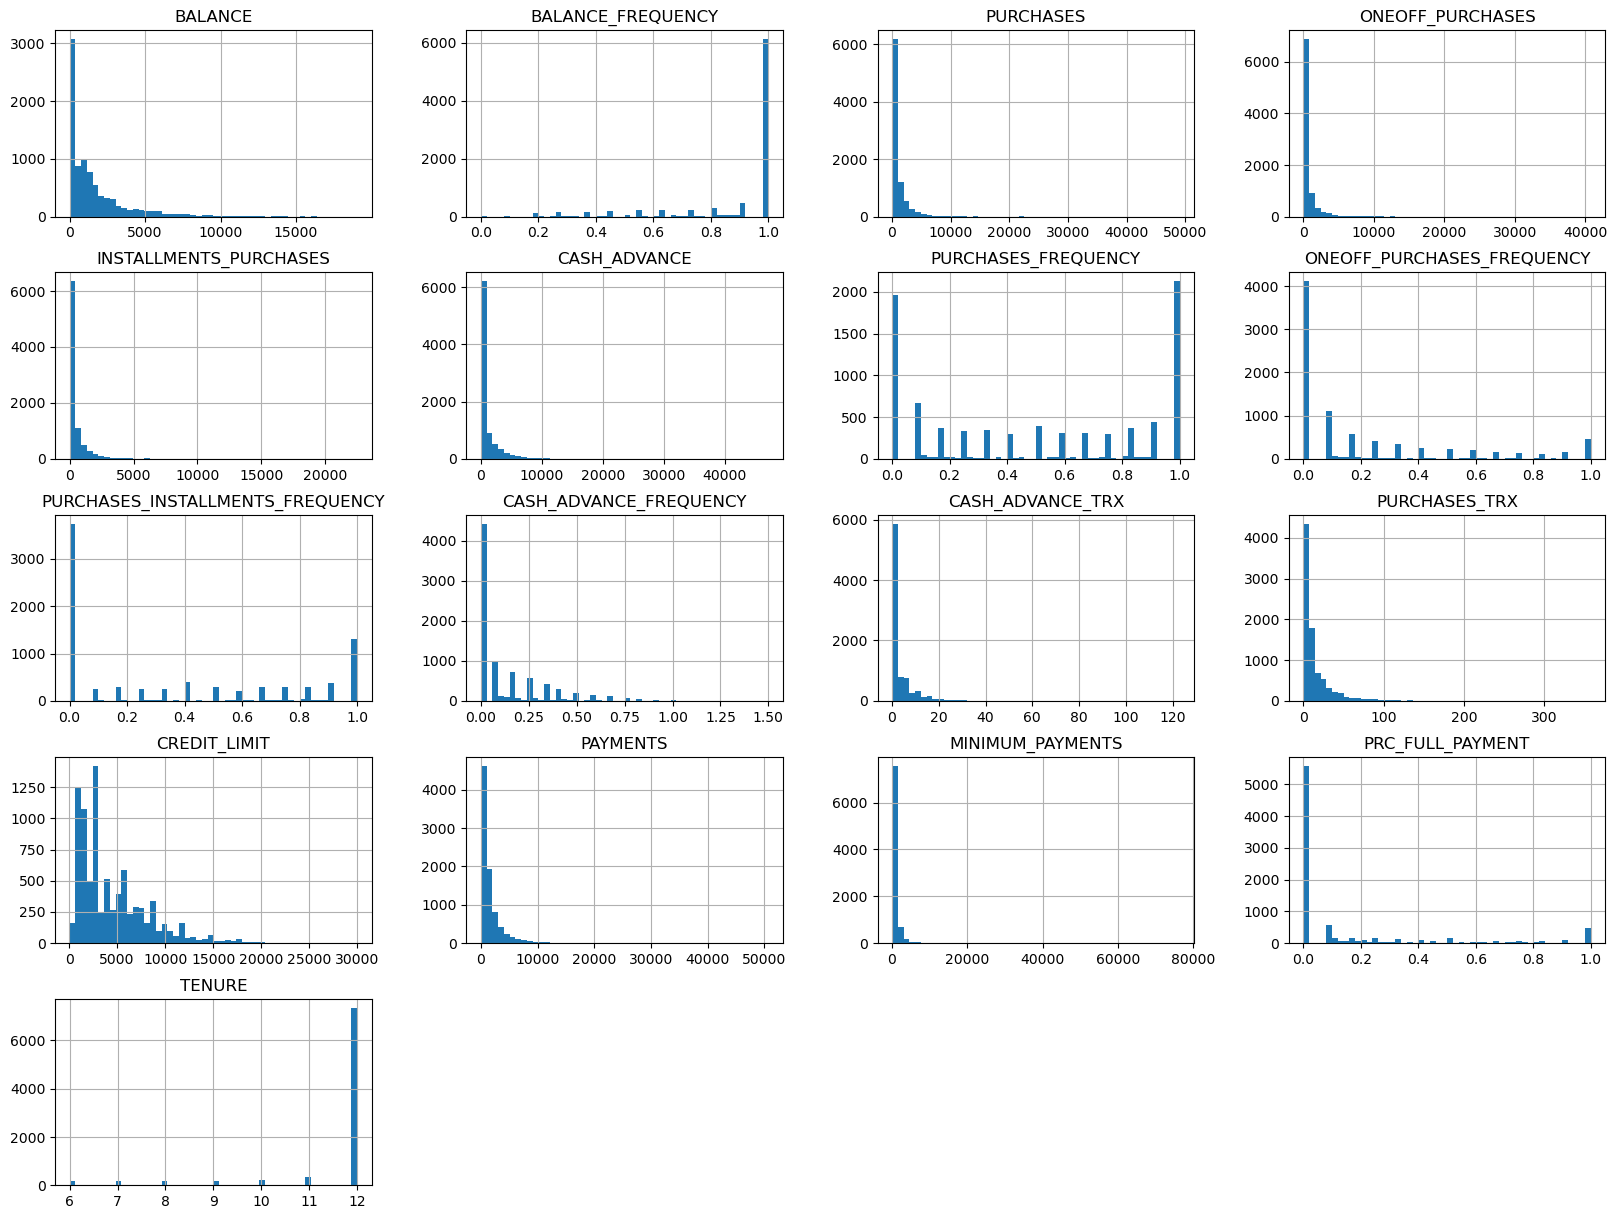

In [11]:
df.hist(bins=50, figsize=(20,15)) 
plt.show()

In [12]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Normalizando os dados

In [13]:
df2 = df.drop('CUST_ID', axis=1)
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df2)


In [14]:
df_norm = pd.DataFrame(df_norm, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'])

In [15]:
df_norm.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


## Aplicando o Método ELbow

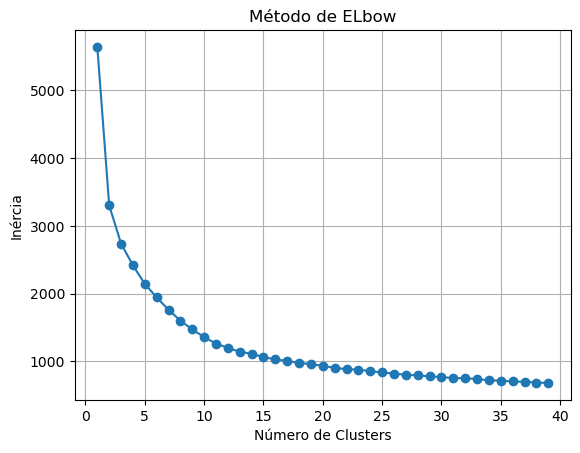

In [16]:
# Aplicar k-means para diferentes números de clusters e armazenar a inércia (variabilidade explicada)
inercia = []
num_clusters_range = range(1, 40, 1)  
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    inercia.append(kmeans.inertia_)

# Plotar a método de Elbow
plt.plot(num_clusters_range, inercia, marker='o')
plt.title('Método de ELbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid()
plt.show()

O método de Elbow indicou que 0 melhor numero de clusters são cinco.

## Alocação de pesos

In [17]:
df_norm.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [18]:
df_norm.PURCHASES = 8*df_norm.PURCHASES
df_norm.CREDIT_LIMIT = 10*df_norm.CREDIT_LIMIT
df_norm.PURCHASES_TRX = 6*df_norm.PURCHASES_TRX
df_norm.ONEOFF_PURCHASES = 6*df_norm.ONEOFF_PURCHASES
df_norm.BALANCE = 6*df_norm.BALANCE
df_norm.PAYMENTS = 4*df_norm.PAYMENTS
df_norm.PURCHASES_FREQUENCY = 4*df_norm.PURCHASES_FREQUENCY
df_norm.CASH_ADVANCE_FREQUENCY = 4*df_norm.CASH_ADVANCE_FREQUENCY
df_norm.TENURE = 2*df_norm.TENURE
df_norm.CASH_ADVANCE_TRX = 2*df_norm.CASH_ADVANCE_TRX

In [19]:
df_norm.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.504505,0.895035,0.167283,0.089041,0.018704,0.021091,1.984000,0.205909,0.368820,0.366945,0.053885,0.251954,1.493186,0.140724,0.011312,0.159304,1.844797
std,0.660260,0.207697,0.353528,0.247928,0.040766,0.045006,1.605091,0.300054,0.398093,0.538110,0.112398,0.422019,1.221783,0.229474,0.031052,0.296271,0.436995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.046661,0.909091,0.007075,0.000000,0.000000,0.000000,0.333332,0.000000,0.000000,0.000000,0.000000,0.016760,0.517529,0.033005,0.002214,0.000000,2.000000
50%,0.288877,1.000000,0.061241,0.006623,0.004213,0.000000,2.000000,0.083333,0.166667,0.000000,0.000000,0.117318,0.984975,0.070710,0.004089,0.000000,2.000000
75%,0.663293,1.000000,0.186948,0.088187,0.021518,0.024023,3.666668,0.333333,0.750000,0.666667,0.065041,0.301676,2.153589,0.153867,0.010804,0.166667,2.000000
max,6.000000,1.000000,8.000000,6.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,2.000000,6.000000,10.000000,4.000000,1.000000,1.000000,2.000000


## Aplicando o modelo Kmeans

In [20]:
num_clusters = 5 
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(df_norm)

In [21]:
df['cluster'] = clusters

In [22]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,3


## Salvando o modelo

In [23]:
with open('kmeans.pkl', 'wb') as arquivo_modelo:
    pickle.dump(kmeans, arquivo_modelo)

In [24]:
#with open('kmeans.pkl', 'rb') as arquivo_modelo:
 #   modelo_carregado = pickle.load(arquivo_modelo)

## Analisando os Clusters

In [25]:
df.cluster.value_counts()

0    2601
2    2367
3    1590
4    1079
1     999
Name: cluster, dtype: int64

In [26]:
df.groupby('cluster').mean(numeric_only=True)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1151.564689,0.839148,130.208920,116.325348,13.922872,970.803339,0.062255,0.044936,0.016504,0.185202,4.032680,1.062284,2533.648597,1078.154747,653.249657,0.056769,11.390619
1,4271.572755,0.916976,389.848909,319.674855,70.312142,3385.463351,0.124527,0.077866,0.047546,0.316847,8.592593,2.512513,9158.613159,3132.547747,1682.022145,0.040288,11.620621
2,808.724189,0.955082,1299.332678,589.911360,709.938635,295.543676,0.941212,0.276382,0.790476,0.059312,1.312210,24.437685,3024.389139,1406.004972,701.724341,0.264700,11.490072
3,794.396298,0.829923,716.212195,457.684182,259.296547,377.731709,0.492931,0.197316,0.298671,0.069851,1.612579,9.705660,3228.883330,1067.990222,579.550079,0.195460,11.576730
4,3140.238153,0.973664,3626.706803,2296.546219,1330.160584,1277.495039,0.913364,0.570557,0.693942,0.128503,3.592215,47.523633,10213.762743,4125.059264,1392.241765,0.232173,11.835959


### Cluster 4: É o grupo de maior valor. São os clientes que possuem compras de maior valor .  São os clientes que possuem maior valor  de compras feitas de uma unica vez. Fazem as compras parceladas em valores maiores. São os clientes que possuem maior limite de cartão de crédito.

### Cluester 0: É o grupo que possui o menor limite de cartão de crédito. É o grupo de clientes que possuem compras de menor valor. São os clientes que possuem menor  valor  de compras feitas de uma unica vez. Fazem as compras parceladas em valores menores. 

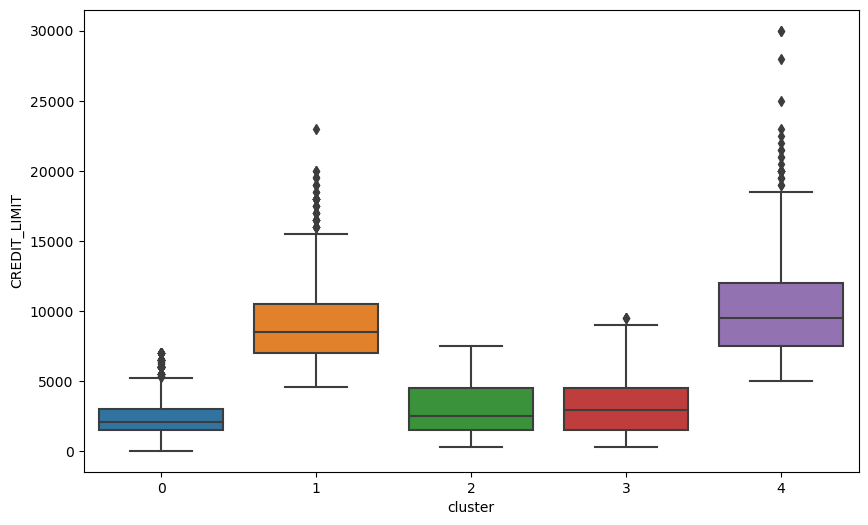

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cluster', y='CREDIT_LIMIT')
plt.show()

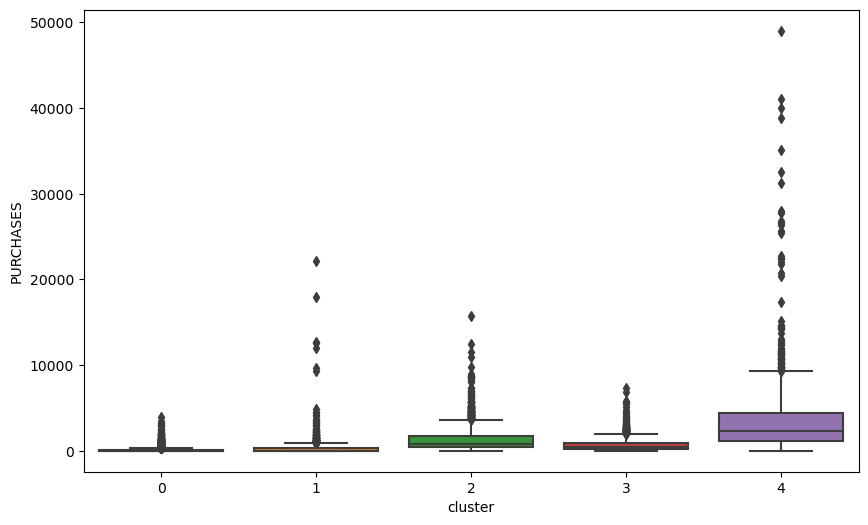

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cluster', y='PURCHASES')
plt.show()

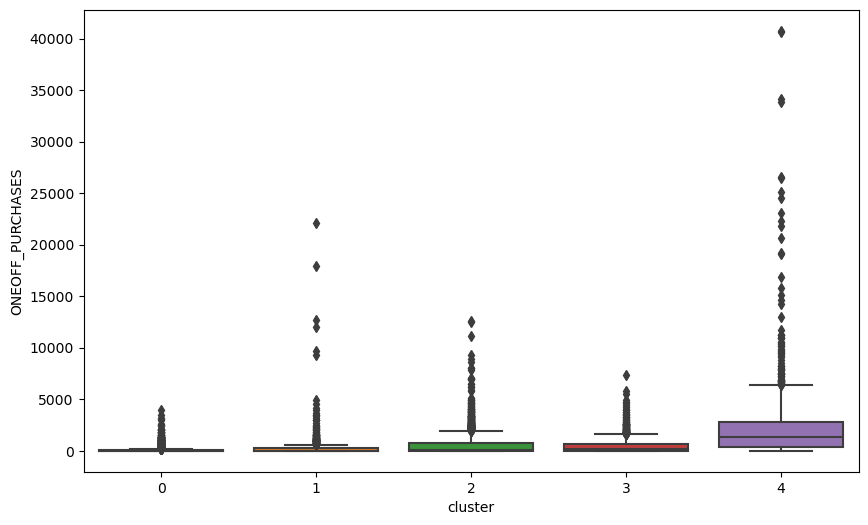

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES')
plt.show()

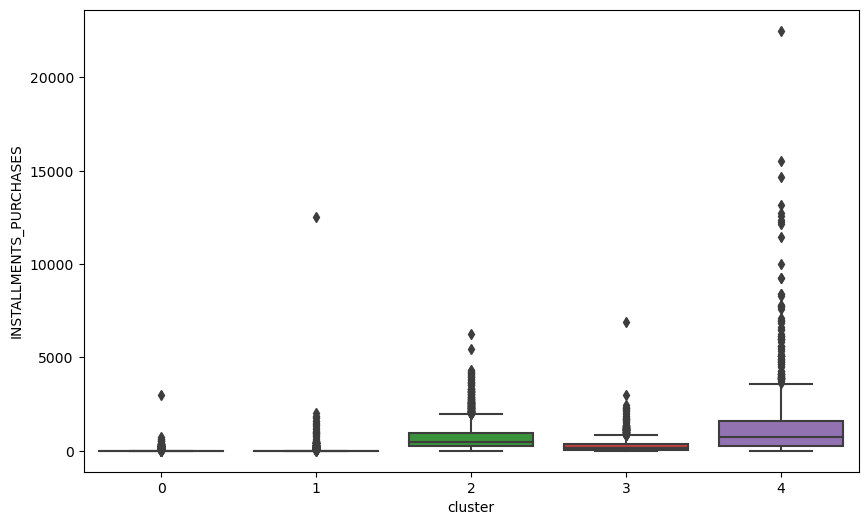

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='cluster', y='INSTALLMENTS_PURCHASES')
plt.show()